In [1]:
# https://stackoverflow.com/questions/48456900/how-can-i-pickle-a-python-object-into-a-csv-file

import base64
import pickle
import csv
import gdown
import pandas as pd
import matplotlib.pyplot as plt


def save_file(name, obj):
  with open(name, 'a', encoding='utf8') as csv_file:
      wr = csv.writer(csv_file, delimiter='|')
      pickle_bytes = pickle.dumps(obj)            # unsafe to write
      b64_bytes = base64.b64encode(pickle_bytes)  # safe to write but still bytes
      b64_str = b64_bytes.decode('utf8')          # safe and in utf8
      wr.writerow(['col1', 'col2', b64_str])
      print('saved!')


  # the file contains
  # col1|col2|gANdcQAu
def load_file(name):
  with open(name, 'r') as csv_file:
      for line in csv_file:
          line = line.strip('\n')
          b64_str = line.split('|')[2]                    # take the pickled obj
          obj = pickle.loads(base64.b64decode(b64_str))   # retrieve
          return obj




In [2]:

gdown.download('https://drive.google.com/uc?id=16Sz1PLcAS-UqzCI9RAxmLvInoGagMnRi','fakeloan_3var_reduced_vaeac_data_no_label.csv',quiet=False)
x_hat = load_file('fakeloan_3var_reduced_vaeac_data_no_label.csv')

Downloading...
From: https://drive.google.com/uc?id=16Sz1PLcAS-UqzCI9RAxmLvInoGagMnRi
To: /content/fakeloan_3var_reduced_vaeac_data_no_label.csv
100%|██████████| 19.7k/19.7k [00:00<00:00, 3.57MB/s]


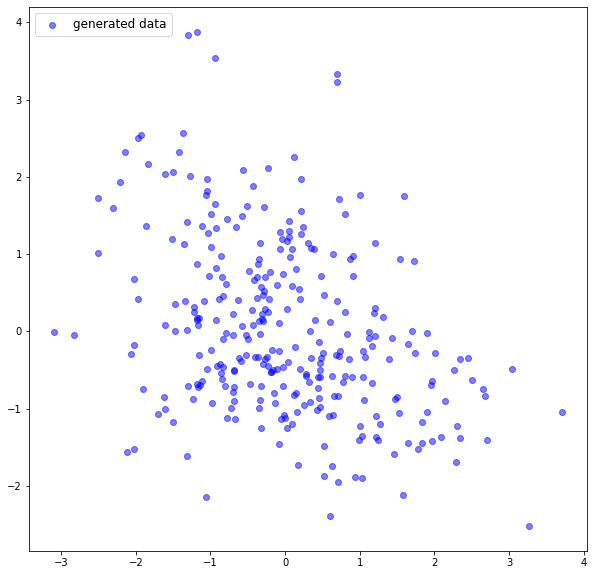

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(x_hat[0], x_hat[1], color='blue', alpha=0.5, label="generated data")
plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=12)
plt.show()